In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_mall = pd.read_csv('/content/drive/My Drive/Kuliah/dataset2/Pengunjung_mall.csv')
df_mall.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encorder
encoder = OneHotEncoder(sparse=False)

# Encorder Categorial Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_mall[['Kelamin']]))
df_encoded.columns = encoder.get_feature_names_out(['Kelamin'])

# Replace Categotical Data with Encoded Data
df_mall.drop(['Kelamin'], axis=1, inplace = True)
df_encoded = pd.concat([df_mall, df_encoded], axis=1)

# Show Encoded DataFrame
df_copy = df_encoded 
df_copy

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,IDPelanggan,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Kelamin_Laki,Kelamin_Perempuan
0,1,19,15,39,1.0,0.0
1,2,21,15,81,1.0,0.0
2,3,20,16,6,0.0,1.0
3,4,23,16,77,0.0,1.0
4,5,31,17,40,0.0,1.0
...,...,...,...,...,...,...
195,196,35,120,79,0.0,1.0
196,197,45,126,28,0.0,1.0
197,198,32,126,74,1.0,0.0
198,199,32,137,18,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Set Name for StandardScaler as scaler
scaler = StandardScaler()

# Fit Standardization
column_names = df_mall.columns.tolist()
df_mall[column_names] = scaler.fit_transform(df_mall[column_names])
df_mall.sort_index(inplace=True)
df_mall

,IDPelanggan,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


Text(0, 0.5, 'Pengeluaran')

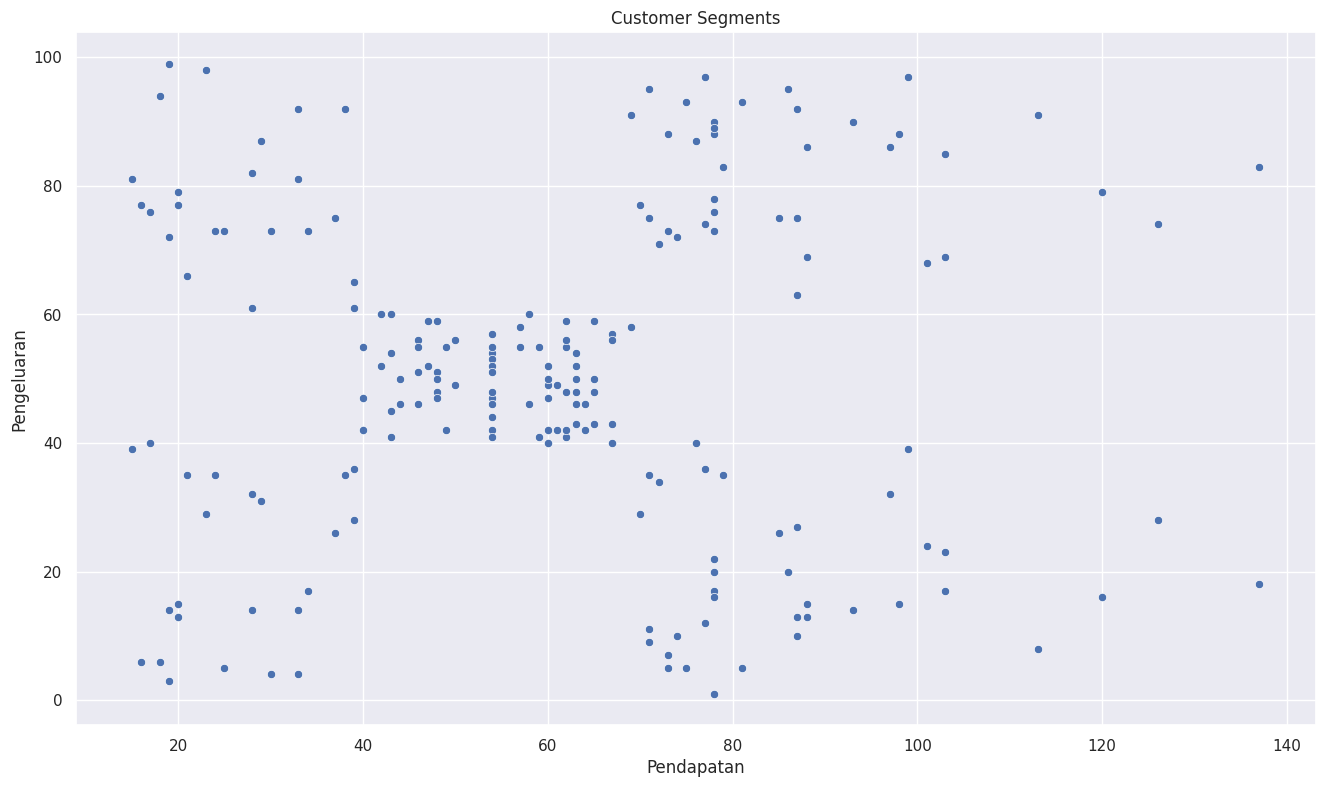

In [ ]:
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Pendapatan (juta Rp)', y='Rating_pengeluaran (1-100)', data=df_encoded)
plt.title('Customer Segments')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran')

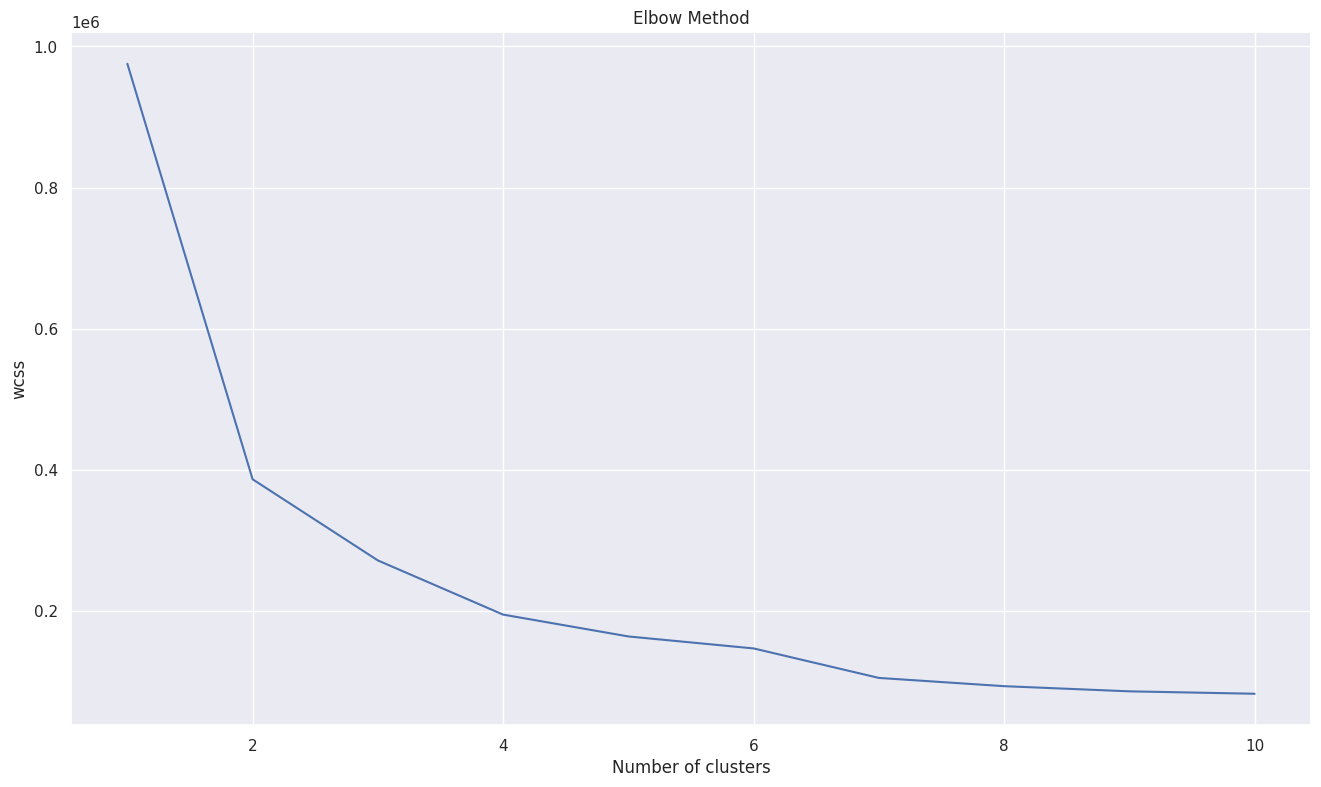

In [ ]:
# Transform Data Frame to Numpy Array
income = df_encoded.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1, random_state=0)
  kmeans.fit(income)
  wcss.append(kmeans.inertia_)

# Visualize
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
  kmeans = KMeans(n_clusters=n_cluster).fit(income)
  label = kmeans.labels_
  sil_coeff = silhouette_score(income, label, metric='euclidean')
  print('For n_clusters ={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters =2, The Silhouette Coefficient is 0.47926366436618395
For n_clusters =3, The Silhouette Coefficient is 0.3766163088457205
For n_clusters =4, The Silhouette Coefficient is 0.4223661897453857
For n_clusters =5, The Silhouette Coefficient is 0.43356778880410424
For n_clusters =6, The Silhouette Coefficient is 0.41180027948030423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =7, The Silhouette Coefficient is 0.4071047508098887
For n_clusters =8, The Silhouette Coefficient is 0.40533884718437574
For n_clusters =9, The Silhouette Coefficient is 0.39651247096771514
For n_clusters =10, The Silhouette Coefficient is 0.39248237632301863


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


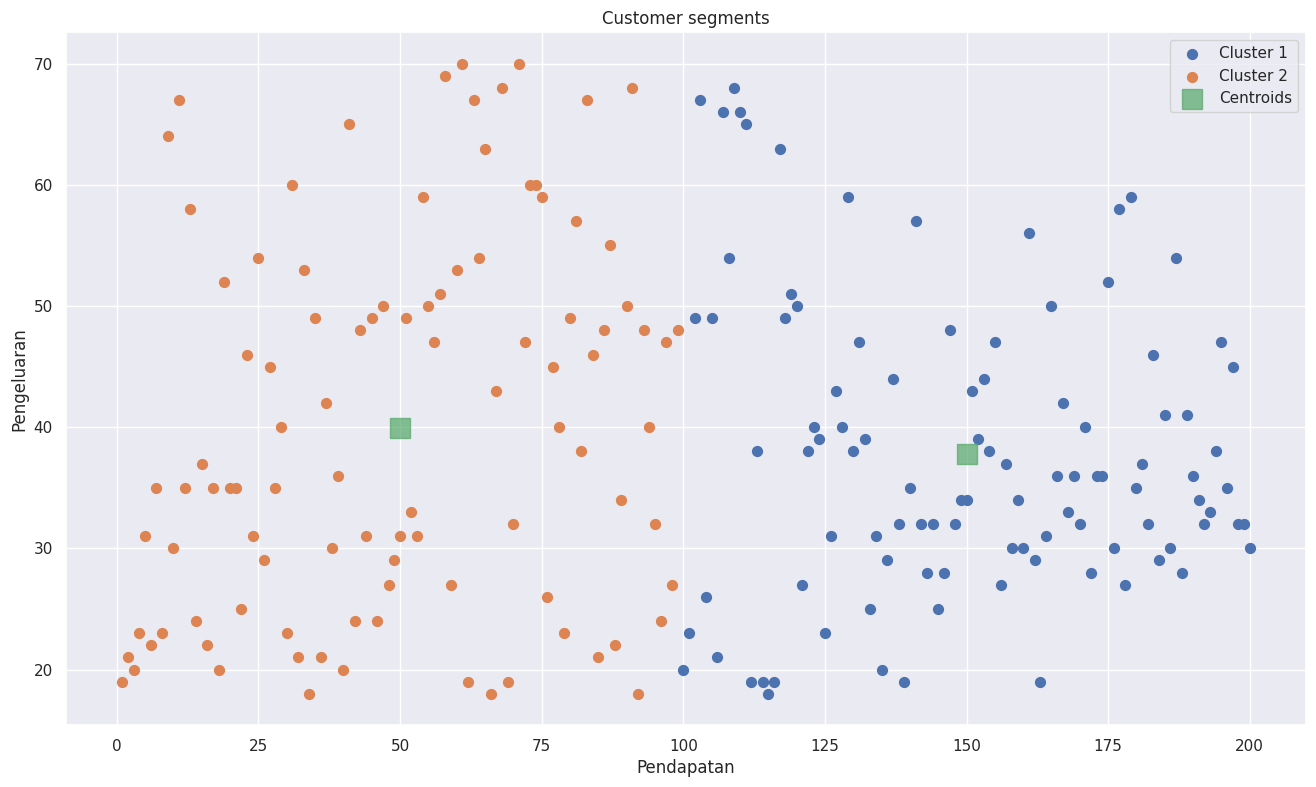

In [ ]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10,random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=2
# sns.scatterplot(x='Annual Income(k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200, marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran')
plt.legend()
plt.show()

In [1]:
df_mall['cluster'] = cluster
df_mall.head(10)

NameError: ignored

In [ ]:
df_mall.to_csv('/content/drive/My Drive/Kuliah/dataset2/Hasil/hasilElbow.csv')